## Homework 1
From Chapter 3, found on page 129 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [14]:
# Import standard libraries
import numpy as np
import pandas as pd
#from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import specific objects
from textwrap import wrap # to avoiding label overlapping in plots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


_a)_	Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `model.summary()` function to print the results. Comment on the output

(i) Is there a relationship between the predictor and the response?
    Yes, The probability F-statistic is very low indicationg strong relationship between predictor and response

(ii) How strong is the relationship between the predictor and the response?
    R-squared of 60% suggests that there is a strong relationship between predictor and response. 

(iii) Is the relationship between the predictor and the response positive or negative? 
    Negative

(iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals? 
    24.4715 and the interval is -0.170517  to -0.145172


In [7]:
X = Auto['horsepower']
y = Auto['mpg']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           7.03e-81
Time:                        12:33:27   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_b)_	Plot the response and the predictor in a new set of axes `ax` using `scatter`. Use the `ax.plot()` function with the predictor and the model prediction as defined in the lab to display the least squares regression line.

In [8]:
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
                    0          1
const       38.525212  41.346510
horsepower  -0.170517  -0.145172


In [ ]:
#Add your code here

_c)_	Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

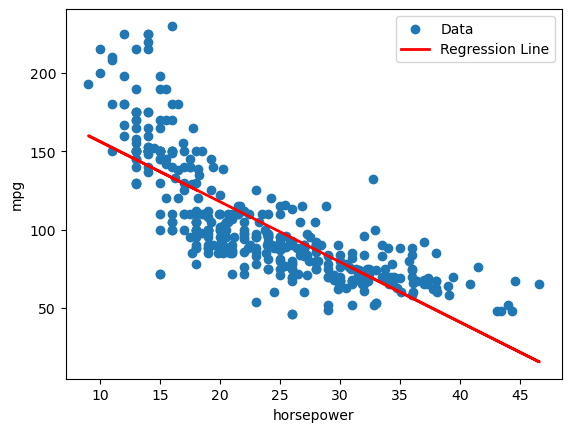

In [18]:
# Extracting 'medv' and 'rm' columns from the dataset
mpg = Auto['horsepower']
hp = Auto['mpg']

# Reshape 'rm' to a 2D array for LinearRegression
rm_reshaped = hp.values.reshape(-1, 1)

# Fit a linear regression model
lm_medv_rm = LinearRegression()
lm_medv_rm.fit(rm_reshaped, mpg)

# Plot 'medv' against 'rm'
plt.scatter(hp, mpg, label='Data')
plt.xlabel('horsepower')
plt.ylabel('mpg')

# Plot the regression line
plt.plot(hp, lm_medv_rm.predict(rm_reshaped), color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

Additional Practice Questions: 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer? 
- What are the key insights you would want to show? 
- Can you think of a business context where this exercise would have applications?